In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

In [17]:
# %%
np.random.seed(42)
years = np.arange(2000, 2021)
vehicle_types = ["Sedan", "SUV", "Truck", "Hatchback"]


# Generate synthetic dataset
data = []
for year in years:
    recession = 1 if year in [2001, 2008, 2009, 2020] else 0
    gdp = np.random.uniform(50, 150) if not recession else np.random.uniform(20, 70)
    unemployment = np.random.uniform(3, 10) if not recession else np.random.uniform(8, 15)
    for v in vehicle_types:
        sales = np.random.randint(200, 1000) if not recession else np.random.randint(50, 400)
        avg_price = np.random.uniform(20000, 40000)
        ad_exp = np.random.uniform(2, 10)
        data.append([year, v, sales, recession, gdp, unemployment, avg_price, ad_exp])


# Create DataFrame
df = pd.DataFrame(data, columns=["Year", "Vehicle_Type", "Sales", "Recession", "GDP", "Unemployment", "Avg_Price", "Ad_Expenditure"])


# PART 1: VISUALIZATIONS



# TASK 1.1 Line chart of sales over years


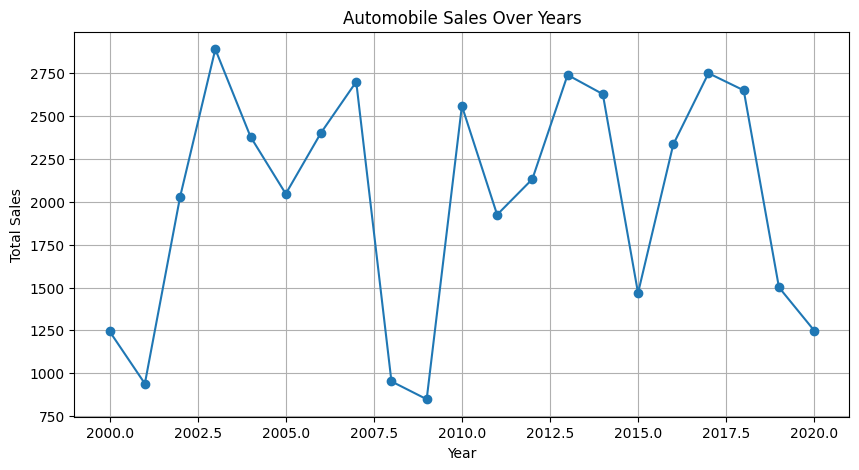

In [18]:

sales_trend = df.groupby("Year")["Sales"].sum()
plt.figure(figsize=(10,5))
plt.plot(sales_trend, marker='o')
plt.title("Automobile Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

# TASK 1.2 Line chart by vehicle type during recession


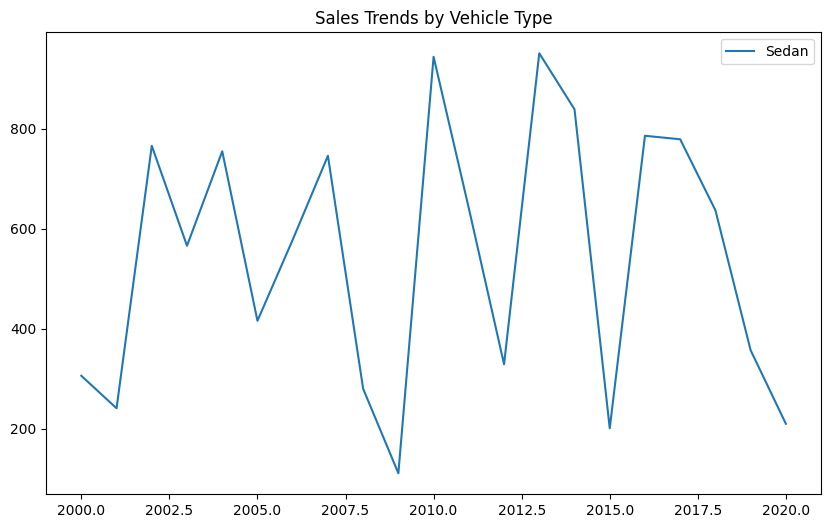

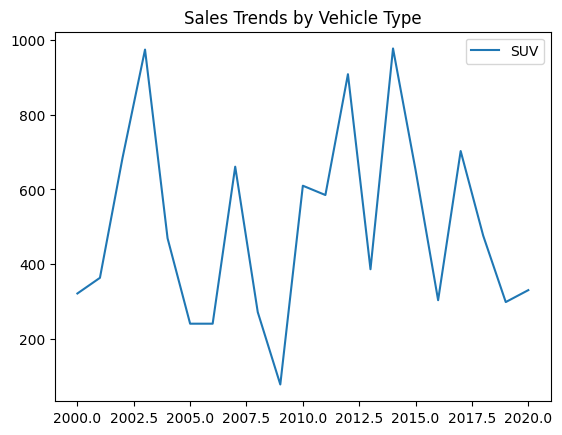

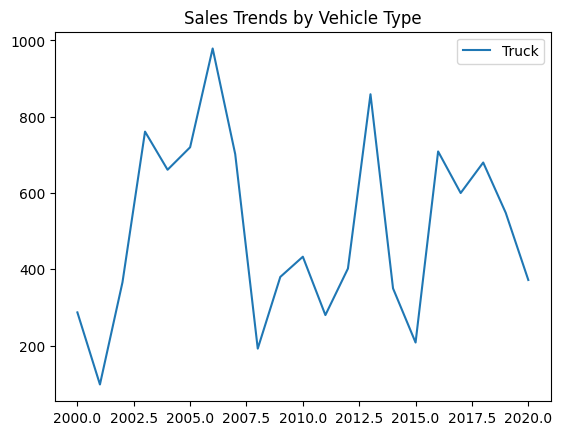

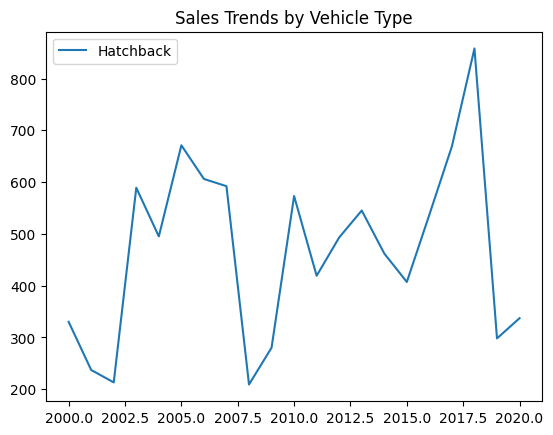

In [19]:

plt.figure(figsize=(10,6))
for v in vehicle_types:
    subset = df[df["Vehicle_Type"] == v].groupby("Year")["Sales"].sum()
    plt.plot(subset.index, subset.values, label=v)
    plt.title("Sales Trends by Vehicle Type")
    plt.legend()
    plt.show()

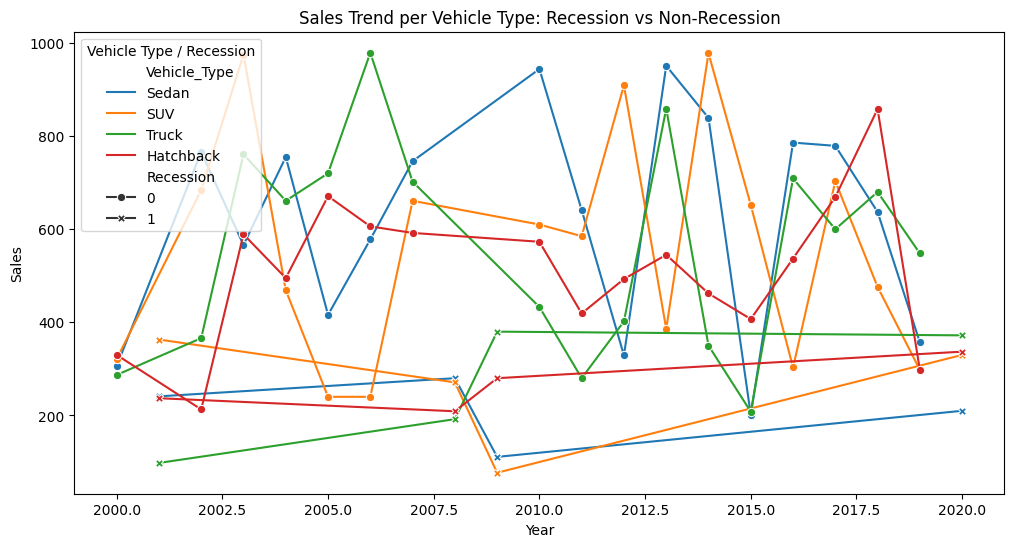

In [21]:

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df,
    x="Year",
    y="Sales",
    hue="Vehicle_Type",
    style="Recession",
    markers=True,
    dashes=False
)

plt.title("Sales Trend per Vehicle Type: Recession vs Non-Recession")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend(title="Vehicle Type / Recession")
plt.show()

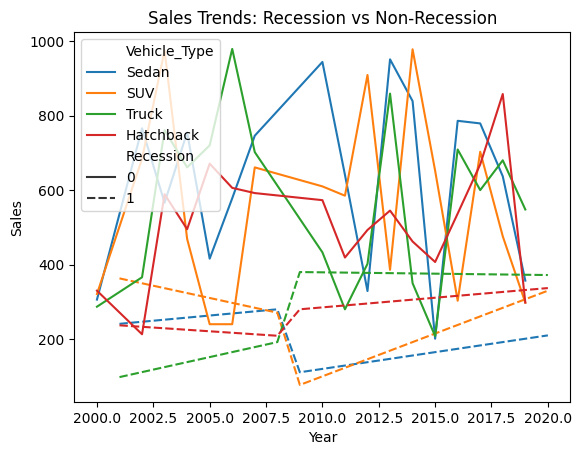

In [5]:

sns.lineplot(data=df, x="Year", y="Sales", hue="Vehicle_Type", style="Recession")
plt.title("Sales Trends: Recession vs Non-Recession")
plt.show()


# TASK 1.4 GDP variations


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13888\2048352298.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[0], data=df[df.Recession==1], x="Year", y="GDP", ci=None)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13888\2048352298.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[1], data=df[df.Recession==0], x="Year", y="GDP", ci=None)


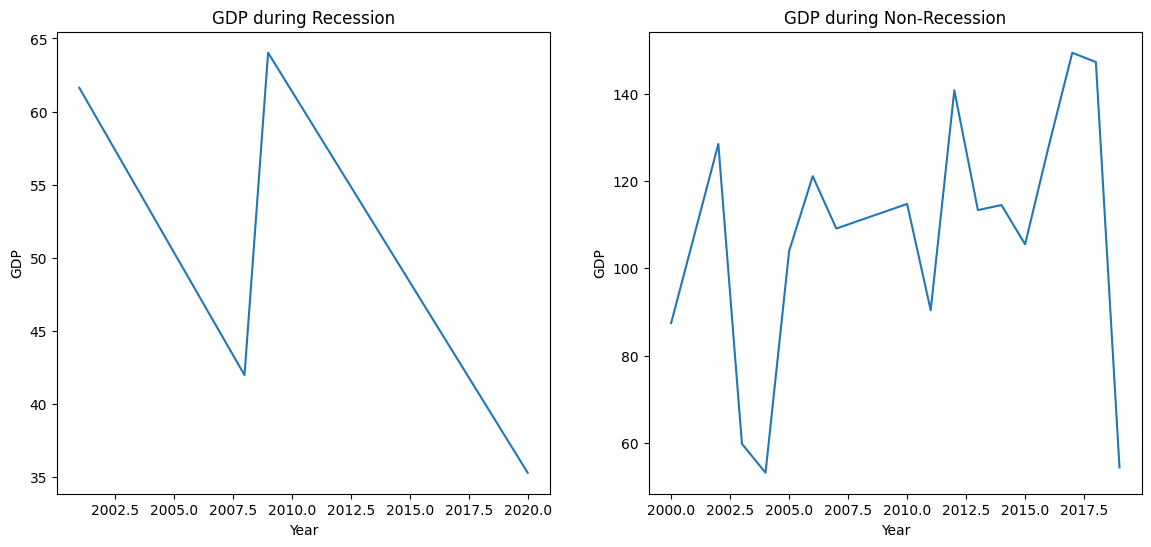

In [6]:

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.lineplot(ax=axes[0], data=df[df.Recession==1], x="Year", y="GDP", ci=None)
axes[0].set_title("GDP during Recession")
sns.lineplot(ax=axes[1], data=df[df.Recession==0], x="Year", y="GDP", ci=None)
axes[1].set_title("GDP during Non-Recession")
plt.show()

#  TASK 1.5 Bubble plot - Seasonality effect

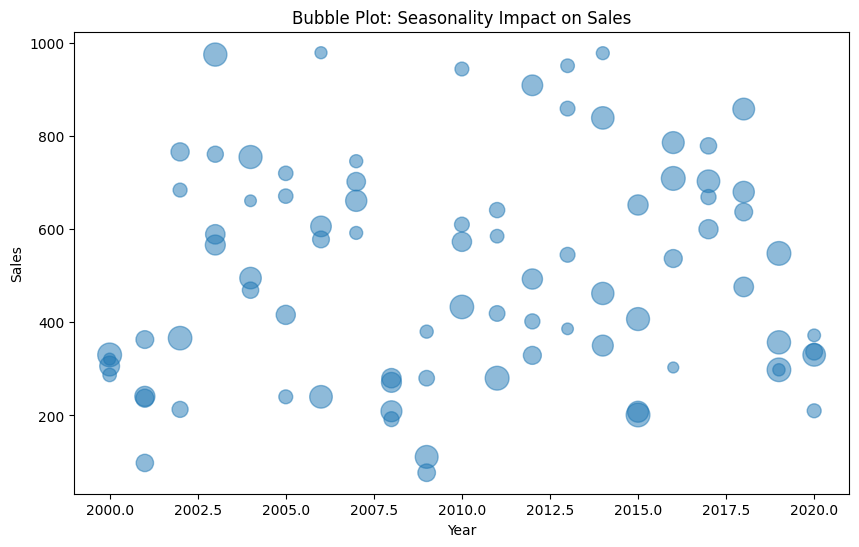

In [7]:

plt.figure(figsize=(10,6))
plt.scatter(df["Year"], df["Sales"], s=df["Ad_Expenditure"]*30, alpha=0.5)
plt.title("Bubble Plot: Seasonality Impact on Sales")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

#  TASK 1.6 Scatter plot - Avg Price vs Sales

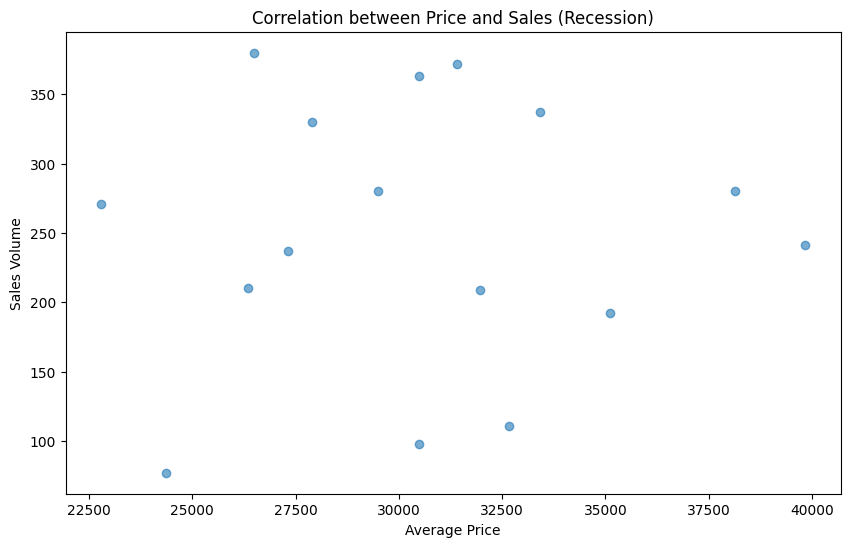

In [8]:

plt.figure(figsize=(10,6))
plt.scatter(df[df.Recession==1]["Avg_Price"], df[df.Recession==1]["Sales"], alpha=0.6)
plt.title("Correlation between Price and Sales (Recession)")
plt.xlabel("Average Price")
plt.ylabel("Sales Volume")
plt.show()

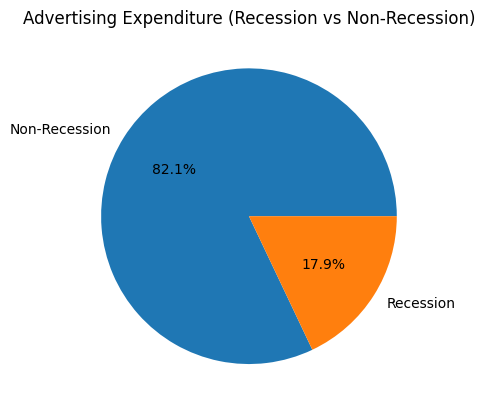

In [9]:

ad_exp = df.groupby("Recession")["Ad_Expenditure"].sum()
plt.pie(ad_exp, labels=["Non-Recession", "Recession"], autopct='%1.1f%%')
plt.title("Advertising Expenditure (Recession vs Non-Recession)")
plt.show()

# TASK 1.8 Pie chart - Ad expenditure by vehicle type (Recession)

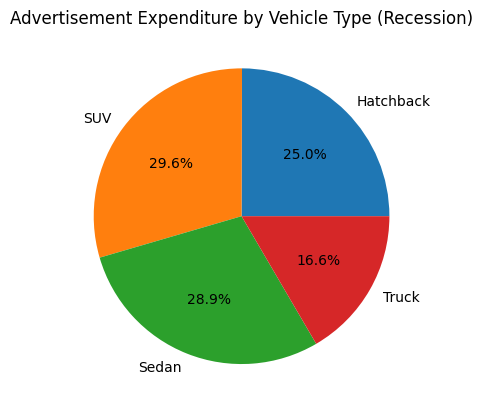

In [10]:

recession_ad = df[df.Recession==1].groupby("Vehicle_Type")["Ad_Expenditure"].sum()
plt.pie(recession_ad, labels=recession_ad.index, autopct='%1.1f%%')
plt.title("Advertisement Expenditure by Vehicle Type (Recession)")
plt.show()

# TASK 1.9 Line plot - Unemployment vs Sales during recession

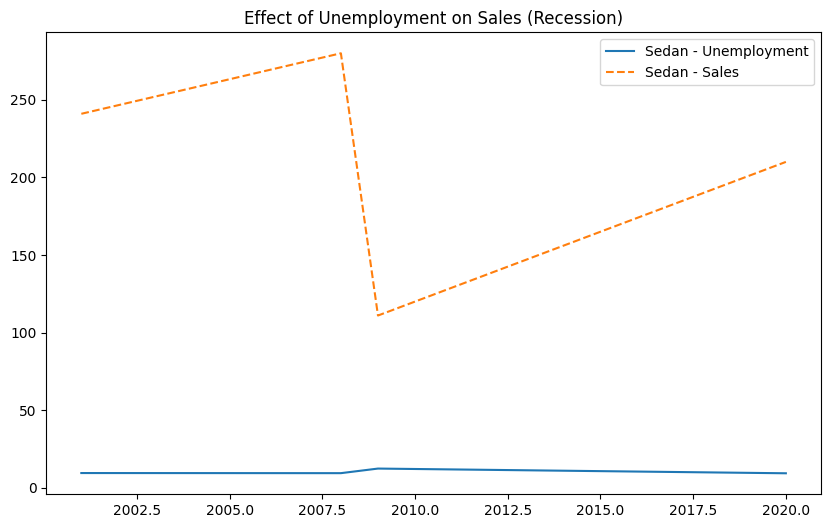

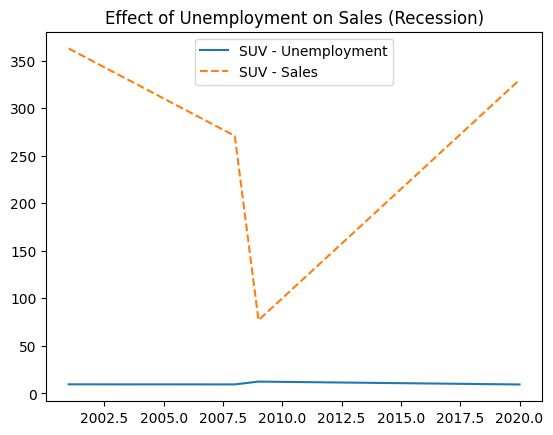

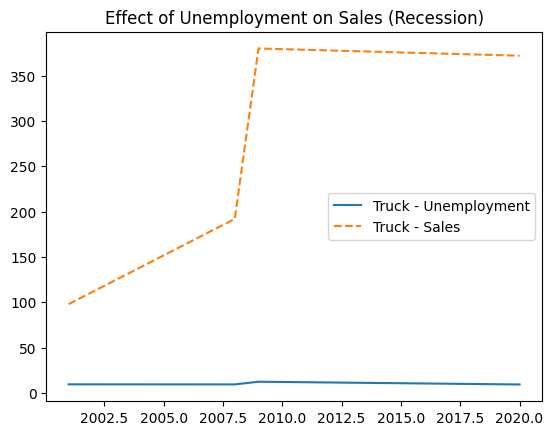

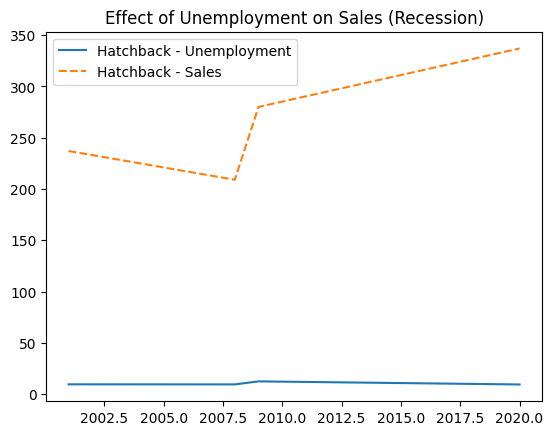

In [11]:

plt.figure(figsize=(10,6))
for v in vehicle_types:
    subset = df[(df.Recession==1) & (df.Vehicle_Type==v)]
    plt.plot(subset["Year"], subset["Unemployment"], label=f"{v} - Unemployment")
    plt.plot(subset["Year"], subset["Sales"], label=f"{v} - Sales", linestyle='--')
    plt.legend()
    plt.title("Effect of Unemployment on Sales (Recession)")
    plt.show()

#  PART 2: DASH APPLICATION

In [12]:

Dash(__name__)


app.layout = html.Div([
html.H1("Automobile Sales Dashboard", style={"textAlign": "center"}),


html.Label("Select Report Type:"),
dcc.Dropdown(
id="report_type",
options=[
{"label": "Recession Report", "value": "recession"},
{"label": "Yearly Report", "value": "yearly"}
],
value="recession"
),


html.Div(id="output_container", className="output_container"),


dcc.Graph(id="sales_graph")
])

In [13]:
print("Recession DataFrame:")
print(df[df["Recession"] == 1].groupby("Year")["Sales"].sum().reset_index().head())

print("Yearly DataFrame:")
print(df.groupby("Year")["Sales"].sum().reset_index().head())


Recession DataFrame:
   Year  Sales
0  2001    939
1  2008    952
2  2009    848
3  2020   1249
Yearly DataFrame:
   Year  Sales
0  2000   1244
1  2001    939
2  2002   2029
3  2003   2891
4  2004   2380


In [14]:
@app.callback(
    [Output("output_container", "children"),
     Output("sales_graph", "figure")],
    [Input("report_type", "value")]
)
def update_graph(option_selected):
    container = f"You chose: {option_selected}"

    if option_selected == "recession":
        df_recession = df[df["Recession"] == 1].groupby("Year")["Sales"].sum().reset_index()
        fig = px.line(df_recession, x="Year", y="Sales",
                      markers=True, title="Recession Report Statistics")
    else:
        df_yearly = df.groupby("Year")["Sales"].sum().reset_index()
        fig = px.bar(df_yearly, x="Year", y="Sales",
                     title="Yearly Report Statistics")

    return container, fig

if __name__ == "__main__":
    app.run(debug=False, port=8051)
